In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model 
from keras.layers import Flatten, Dense 

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img

In [ ]:
base_model = MobileNet(input_shape = (224, 224, 3), include_top = False)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units = 7, activation = "softmax")(x)

model = Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer = "adam", loss = "categorial_crossentropy", metrics = ["accuracy"])

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory = "/content/train", target_size = (224, 224), batch_size = 32)

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1/255)

val_data = val_datagen.flow_from_directory(directory = "/content/train", target_size = (224, 224), batch_size = 32)

Found 350 images belonging to 7 classes.


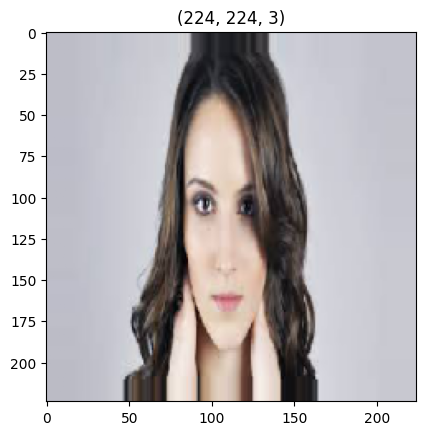

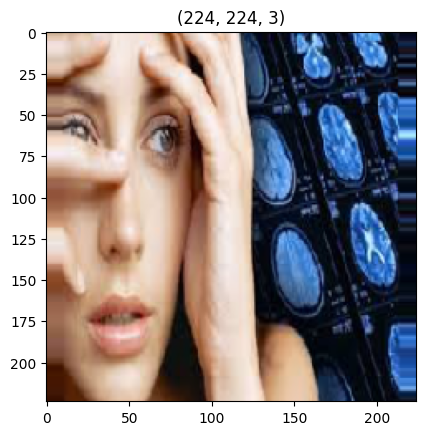

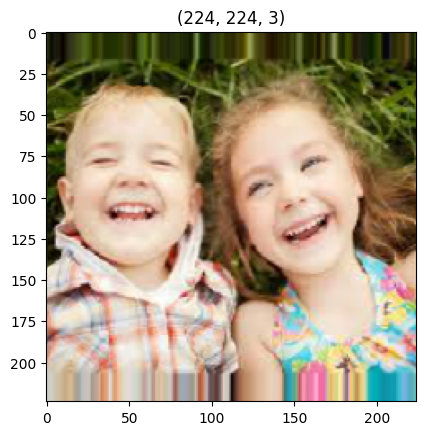

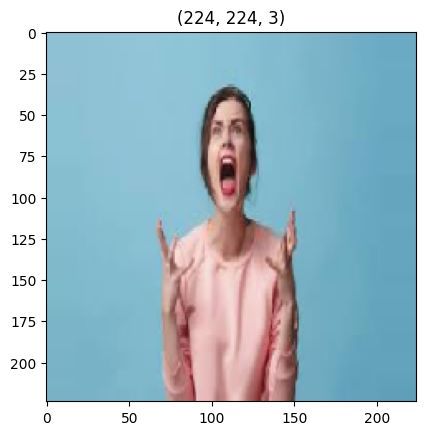

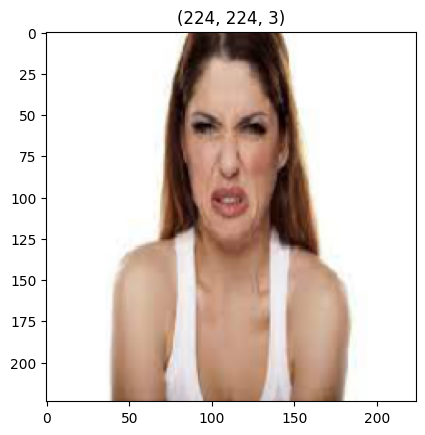

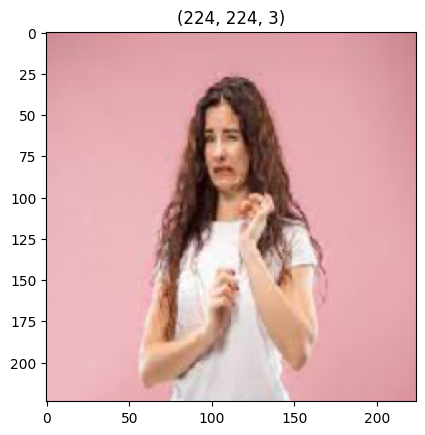

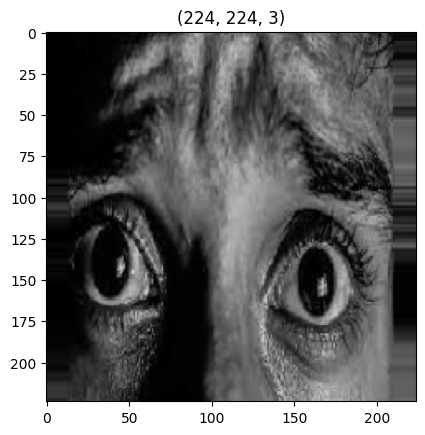

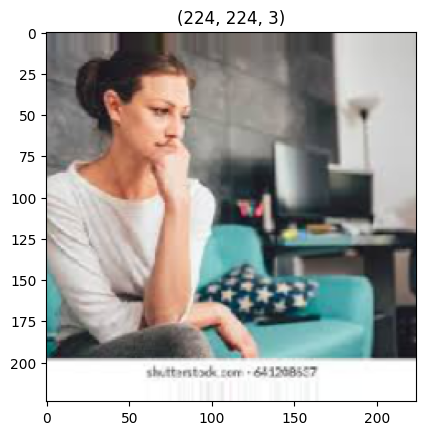

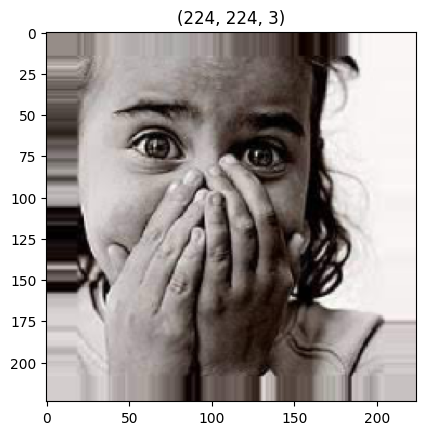

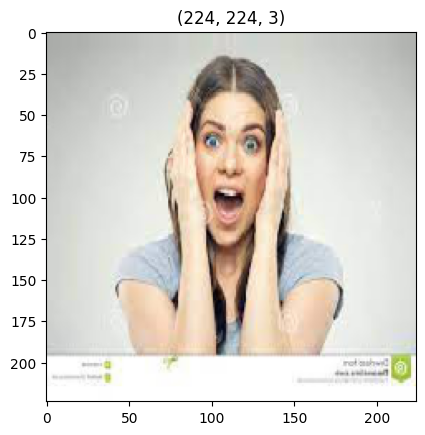

In [ ]:
t_img, label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if (count == 10):
      break

plotImages(t_img, label)

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01 , patience = 5, verbose = 1, mode = 'auto')

# model check point
mc = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

<ipython-input-22-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30


ValueError: ignored

In [ ]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

OSError: ignored

In [ ]:
h =  hist.history
h.keys()

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
# path for the image to see if it predics correct class

path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()